In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)
import os
import chart_studio.plotly as py
# import plotly.graph_ogjs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
#Importing the data
final_df=pd.DataFrame()
a_df=pd.DataFrame()
b_df=pd.DataFrame()
c_df=pd.DataFrame()

for file_n in os.listdir('listings'):
    if file_n[0]=='.':
        continue
    else:
        add_df = pd.read_csv(f'listings/{file_n}')
        if len(add_df.columns)==106:
            final_df = pd.concat([final_df, add_df], axis=0)
        elif len(add_df.columns)==96:
            a_df = pd.concat([a_df, add_df], axis=0)
        elif len(add_df.columns)==95:
            b_df = pd.concat([b_df, add_df], axis=0)
        else:
            c_df = pd.concat([c_df, add_df], axis=0)

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [3]:
#These are the columns not present in 2018 reports. They will be dropped.
not_in_2018 = ['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
       'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'number_of_reviews_ltm', 
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
       'calculated_host_listings_count_shared_rooms']
sf_df = final_df.drop(columns=not_in_2018)
sf_df = pd.concat([sf_df, a_df], axis=0)

#drop one column not in 2017
sf_df = sf_df.drop(columns=['is_business_travel_ready'])
sf_df = pd.concat([sf_df, b_df], axis=0)

#drop 3 columns not in 2016 & Prior
sf_df = sf_df.drop(columns=['access', 'interaction', 'house_rules'])
sf_df = pd.concat([sf_df, c_df], axis=0)

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




### Should we also add 2016? Columns are less & we would love the text columns "Access, Interaction, house_rules"

In [4]:
# old_95_df = pd.DataFrame()
# old_92_df = pd.DataFrame()

# for file_n in os.listdir('listings/Prior_to_2016'):
#     if file_n[0]=='.':
#         continue
#     else:
#         add_df = pd.read_csv(f'listings/Prior_to_2016/{file_n}')
#         if len(add_df.columns)==92:
#             old_92_df = pd.concat([old_92_df, add_df], axis=0)
#         else:
#             old_95_df = pd.concat([old_95_df, add_df], axis=0)
# #         print(file_n, len(add_df.columns))
# # #         old_df = pd.concat([old_df, add_df], axis=0)

In [5]:
# #columns present in new but not old
# print(sf_df.columns[~sf_df.columns.isin(old_92_df.columns)])

# # pd.DataFrame([np.sort(old_df.columns), np.sort(sf_df.columns)],index=['old','new'])

## Initial Look at the Data

In [6]:
sf_df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",11.0,68.0,19.0,21.0,1.0,Real Bed,1.0,2.0,1,2020-03-14,yesterday,moderate,San Francisco,$100.00,United States,US,New update: the house next door is under const...,none,$25.00,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,99%,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/user/efdad...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/user/efdad...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",958,t,t,"{""SAN FRANCISCO""}",2020-02-28,2020-03-14,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,30,NaN,1,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Lower Haight,Western Addition,NaN,Due to the fact that we have children and a do...,237,https://a0.muscache.com/im/pictures/b7c2a199-4...,$170.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.83,Entire home/apt,20200313233841,$100.00,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
1,5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0.0,0.0,0.0,0.0,1.0,Real Bed,2.0,3.0,1,2020-03-14,3 months ago,strict_14_with_grace_period,San Francisco,$100.00,United States,US,We live in a large Victorian house on a quiet ...,none,$0.00,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,83%,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,100%,within a day,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...",5858,f,t,"{""SAN FRANCISCO""}",2017-08-06,2020-03-14,37.74511,NaN,https://www.airbnb.com/rooms/5858,-122.42102,San Francisco,60,NaN,30,"$5,500.00",Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,NaN,All the furniture in the house was handmade so...,111,https://a0.muscache.com/im/pictures/17714/3a7a...,$235.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.84,Entire home/apt,20200313233841,NaN,"San Francisco, CA",We live in a large Victorian house on a quiet ...,NaN,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,"$1,600.00",NaN,94110
2,2,"{TV,In

In [7]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395202 entries, 0 to 7028
Data columns (total 92 columns):
accommodates                        395202 non-null int64
amenities                           389777 non-null object
availability_30                     395200 non-null float64
availability_365                    395200 non-null float64
availability_60                     395200 non-null float64
availability_90                     395200 non-null float64
bathrooms                           393685 non-null float64
bed_type                            395202 non-null object
bedrooms                            394978 non-null float64
beds                                394632 non-null float64
calculated_host_listings_count      395202 non-null int64
calendar_last_scraped               395202 non-null object
calendar_updated                    395202 non-null object
cancellation_policy                 389775 non-null object
city                                395016 non-null object
c

In [8]:
pd.set_option('display.max_rows', None)
sf_df.dtypes

accommodates                          int64
amenities                            object
availability_30                     float64
availability_365                    float64
availability_60                     float64
availability_90                     float64
bathrooms                           float64
bed_type                             object
bedrooms                            float64
beds                                float64
calculated_host_listings_count        int64
calendar_last_scraped                object
calendar_updated                     object
cancellation_policy                  object
city                                 object
cleaning_fee                         object
country                              object
country_code                         object
description                          object
experiences_offered                  object
extra_people                         object
first_review                         object
guests_included                 

In [9]:
#Null Cells
pd.set_option('display.max_rows', None)
print(f'Total rows: {len(sf_df)}')
(sf_df.isnull().sum()/len(sf_df)).sort_values(ascending=False)

Total rows: 395202


neighbourhood_group_cleansed        1.000000
square_feet                         0.978996
monthly_price                       0.807213
host_acceptance_rate                0.777256
weekly_price                        0.766869
license                             0.617854
thumbnail_url                       0.563127
medium_url                          0.563127
xl_picture_url                      0.563127
notes                               0.467040
has_availability                    0.389123
security_deposit                    0.376147
neighborhood_overview               0.342496
transit                             0.339009
host_about                          0.269356
review_scores_value                 0.213002
review_scores_checkin               0.212906
review_scores_location              0.212871
review_scores_accuracy              0.212355
review_scores_cleanliness           0.212142
review_scores_communication         0.212079
review_scores_rating                0.211160
space     

In [10]:
sf_df.describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,host_id,host_listings_count,host_total_listings_count,id,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_group_cleansed,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,scrape_id,square_feet
count,395202.000000,395200.000000,395200.000000,395200.000000,395200.000000,393685.000000,394978.000000,394632.000000,395202.000000,395202.000000,3.952020e+05,389472.000000,389472.000000,3.952020e+05,395202.000000,395202.000000,3.952020e+05,3.952020e+05,0.0,395202.000000,311279.000000,311061.000000,311363.000000,311388.000000,311075.000000,311751.000000,311023.000000,314961.000000,3.952020e+05,8301.000000
mean,3.200313,8.870979,148.007756,21.147032,35.403446,1.319522,1.350141,1.752169,9.874507,1.655930,3.486865e+07,35.828083,35.828083,1.231826e+07,37.766612,-122.430566,2.359974e+05,7.094274e+03,NaN,33.596376,9.695890,9.815293,9.536801,9.808143,9.588713,94.929572,9.376776,1.826497,2.017568e+13,973.150102
std,2.007036,10.569430,137.026660,21.602063,32.995292,0.767639,0.942411,1.240402,34.567372,1.311165,5.380718e+07,199.630548,199.630548,9.989307e+06,0.022366,0.026153,2.215310e+07,8.416947e+05,NaN,60.777071,0.716683,0.580754,0.857040,0.599284,0.749737,7.224046,0.818956,2.041877,1.412479e+10,729.385627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000,0.000000,9.580000e+02,37.704145,-122.513147,1.000000e+00,1.000000e+00,NaN,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.000000,2.015050e+13,0.000000
25%,2.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.295580e+06,1.000000,1.000000,4.251491e+06,37.752180,-122.442660,2.800000e+01,1.000000e+00,NaN,1.000000,10.000000,10.000000,9.000000,10.000000,9.000000,93.000000,9.000000,0.370000,2.016110e+13,450.000000
50%,2.000000,4.000000,101.000000,14.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.173749e+07,1.000000,1.000000,1.021346e+07,37.768487,-122.425460,3.650000e+02,2.000000e+00,NaN,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,97.000000,10.000000,1.080000,2.017100e+13,850.000000
75%,4.000000,16.000000,294.000000,39.000000,65.000000,1.500000,2.000000,2.000000,3.000000,2.000000,4.318947e+07,4.000000,4.000000,1.804220e+07,37.784990,-122.411899,1.125000e+03,6.000000e+00,NaN,38.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,2.720000,2.019040e+13,1390.000000
max,18.000000,30.000000,365.000000,60.000000,90.000000,15.000000,30.000000,30.000000,301.000000,30.000000,3.428298e+08,2347.000000,2347.000000,4.312629e+07,37.833405,-122.363243,2.147484e+09,1.000000e+08,NaN,821.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,223.000000,2.020041e+13,5500.000000


# Data Cleaning & Exploration

In [11]:
pd.set_option('display.max_rows', 20)
#Converting Existing Data Columns to Dates
sf_df['last_scraped'] = pd.to_datetime(sf_df['last_scraped'])
sf_df['host_since'] = pd.to_datetime(sf_df['host_since'])
#Adding new date features
sf_df['year'] = sf_df['last_scraped'].transform(lambda x: x.year)
sf_df['month-year'] = sf_df['last_scraped'].transform(lambda x: f'{x.month} {x.year}')
sf_df['month'] = sf_df['last_scraped'].transform(lambda x: x.month)
sf_df['day_of_week'] = sf_df['last_scraped'].transform(lambda x: x.dt.dayofweek)
sf_df['day'] = sf_df['last_scraped'].transform(lambda x: x.day)

#Converting All Price Related Columns from Objects to Floats
sf_df['price'] = sf_df['price'].transform(lambda x: float(x.replace(',', '').replace('$', '')))
sf_df['extra_people'] = sf_df['extra_people'].transform(lambda x: float(x.replace(',', '').replace('$', '')))

#Fill NaNs in fee columns with 0's, because no additional fee, then convert
sf_df[['security_deposit','cleaning_fee']] = sf_df[['security_deposit','cleaning_fee']].fillna(int(0))
sf_df['security_deposit'] = sf_df['security_deposit'].transform(lambda x: 0 if x==int(0) else float(x.replace(',', '').replace('$', '')))
sf_df['cleaning_fee'] = sf_df['cleaning_fee'].transform(lambda x: 0 if x==int(0) else float(x.replace(',', '').replace('$', '')))

#Dropping columns that have over 75% null
over_70_null = sf_df.columns[sf_df.isnull().sum()/len(sf_df) > 0.70]
sf_df = sf_df.drop(columns=over_70_null)

In [12]:
#View of cleaned data for reference
sf_df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,state,street,summary,thumbnail_url,transit,xl_picture_url,zipcode,year,month-year,month,day_of_week,day
0,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",11.0,68.0,19.0,21.0,1.0,Real Bed,1.0,2.0,1,2020-03-14,yesterday,moderate,San Francisco,100.0,United States,US,New update: the house next door is under const...,none,25.0,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/user/efdad...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/user/efdad...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",958,t,t,"{""SAN FRANCISCO""}",2020-02-28,2020-03-14,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,30,NaN,1,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Lower Haight,Western Addition,Due to the fact that we have children and a do...,237,https://a0.muscache.com/im/pictures/b7c2a199-4...,170.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.83,Entire home/apt,20200313233841,100.0,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,NaN,94117,2020,3 2020,3,5,14
1,5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0.0,0.0,0.0,0.0,1.0,Real Bed,2.0,3.0,1,2020-03-14,3 months ago,strict_14_with_grace_period,San Francisco,100.0,United States,US,We live in a large Victorian house on a quiet ...,none,0.0,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,100%,within a day,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...",5858,f,t,"{""SAN FRANCISCO""}",2017-08-06,2020-03-14,37.74511,NaN,https://www.airbnb.com/rooms/5858,-122.42102,San Francisco,60,NaN,30,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,All the furniture in the house was handmade so...,111,https://a0.muscache.com/im/pictures/17714/3a7a...,235.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.84,Entire home/apt,20200313233841,0.0,"San Francisco, CA",We live in a large Victorian house on a quiet ...,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,NaN,94110,2020,3 2020,3,5,14
2,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30.0,365.0,60.0,90.0,4.0,Real Bed,1.0,1.0,9,2020-03-1

### Spike in Airbnb Rentals in 2017 were strongly linked to rent increases in some of the largest US metro areas

In [13]:
#NOTE TO SELF: 2018 IS MISSING JUNE DATA/LISTINGS, 2016 is missing Jan, Mar, 2015 is missing most months
sf_df['year'].value_counts()

2017    101697
2016     85420
2019     85109
2018     63088
2020     33908
2015     25980
Name: year, dtype: int64

In [14]:
sf_df[sf_df==0].count().sort_values(ascending=False).head(20)

extra_people                 226406
security_deposit             195251
availability_30              152751
availability_60              121800
availability_90              105979
cleaning_fee                  88987
number_of_reviews             80057
availability_365              79407
day_of_week                   49341
bedrooms                      36542
host_total_listings_count      4469
host_listings_count            4469
beds                           2972
bathrooms                      2927
guests_included                2879
price                           205
reviews_per_month                26
accommodates                      1
host_response_time                0
host_response_rate                0
dtype: int64

## Train Test Split

In [15]:
train_df = sf_df[sf_df['year'] != 2020]
test_df = sf_df[sf_df['year'] == 2020]

In [16]:
pd.set_option('display.max_rows', 50)

## Data Visualizations

Text(0, 0.5, 'Average Daily Price of Listing')

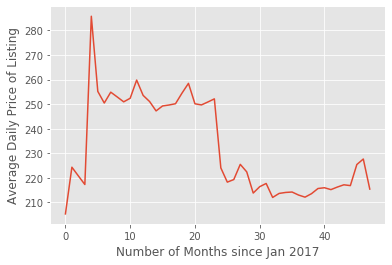

In [17]:
labels = train_df.sort_values('last_scraped')['month-year'].unique()
data = train_df.groupby(['year','month']).mean()['price']
fig, ax = plt.subplots()
ax.plot(data.values)
ax.set_xlabel('Number of Months since Jan 2017')
ax.set_ylabel('Average Daily Price of Listing')
# ax.set_xticks(labels)

Text(0.5, 1.0, 'Average Daily Rates in SF per year')

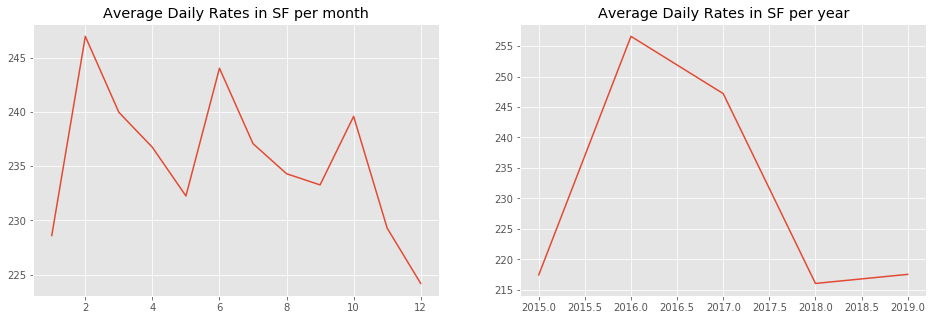

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(train_df.groupby('month').mean()['price'])
ax[0].set_title('Average Daily Rates in SF per month')
ax[1].plot(train_df.groupby('year').mean()['price'])
ax[1].set_title('Average Daily Rates in SF per year')

Text(0, 0.5, 'Frequency')

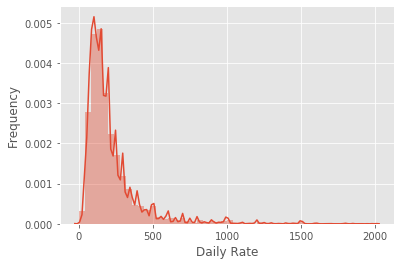

In [19]:
#Pretty right skewed, may need to convert to log
outlier_cutoff = 2000
sns.distplot(train_df[train_df['price']<outlier_cutoff]['price'])
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

Text(0.5, 0, 'Log of Daily Airbnb Prices')

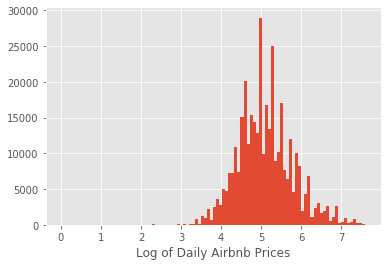

In [20]:
# #Why are we getting negative log?
crt1 = (train_df['price']<outlier_cutoff)
crt2 = (train_df['price']>0)
x = np.log((train_df[crt1 & crt2]['price']))
x.hist(bins=100)
plt.xlabel('Log of Daily Airbnb Prices')
# train_df[train_df['price']==0] #Note to self, need to remove/deal with 0
#More normal distribution. Can decide how to deal with the 0's 

Outlier Cutoff: 25, Pct Outliers: 0.0014780206701467502


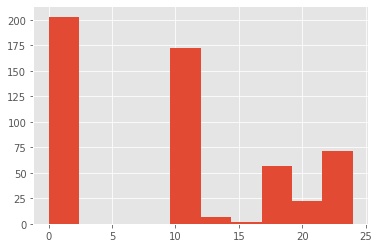

In [21]:
#Visualizing lower end of outliers
print(f"Outlier Cutoff: {25}, Pct Outliers: {train_df[train_df['price']<25]['price'].count()/len(train_df)}")
train_df[train_df['price']<25]['price'].hist()
#Note to self, need to remove or impude these outliers

Outlier Cutoff: 2000, Pct Outliers: 0.0038251396369715523


Text(0, 0.5, 'Frequency')

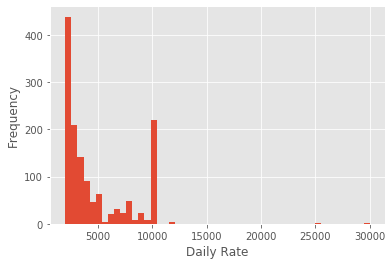

In [22]:
#Visualizing high end of outliers
print(f"Outlier Cutoff: {outlier_cutoff}, Pct Outliers: {train_df[train_df['price']>outlier_cutoff]['price'].count()/len(train_df)}")

train_df[train_df['price']>outlier_cutoff]['price'].hist(bins=50)
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

In [23]:
numeric_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 36 numeric and 56 categorical columns in train data


## Data Visualizations: Numeric Data

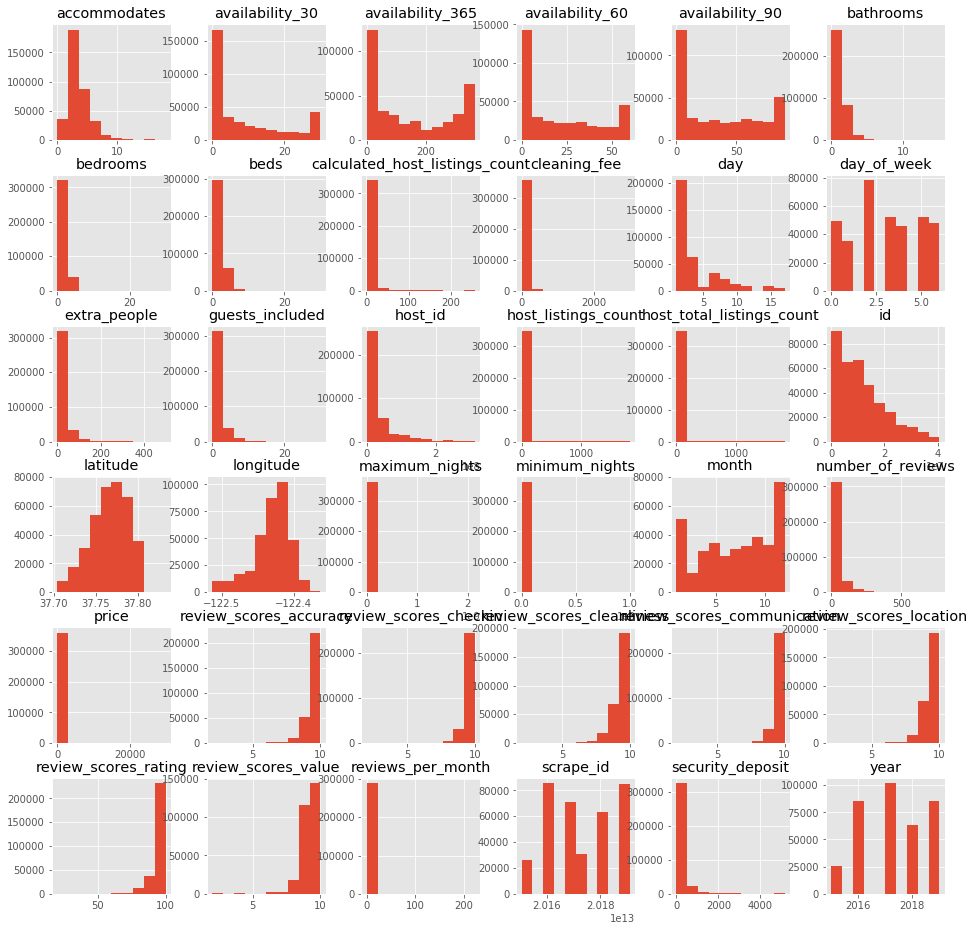

In [24]:
numeric_data.hist(figsize=(16,16))
plt.show()

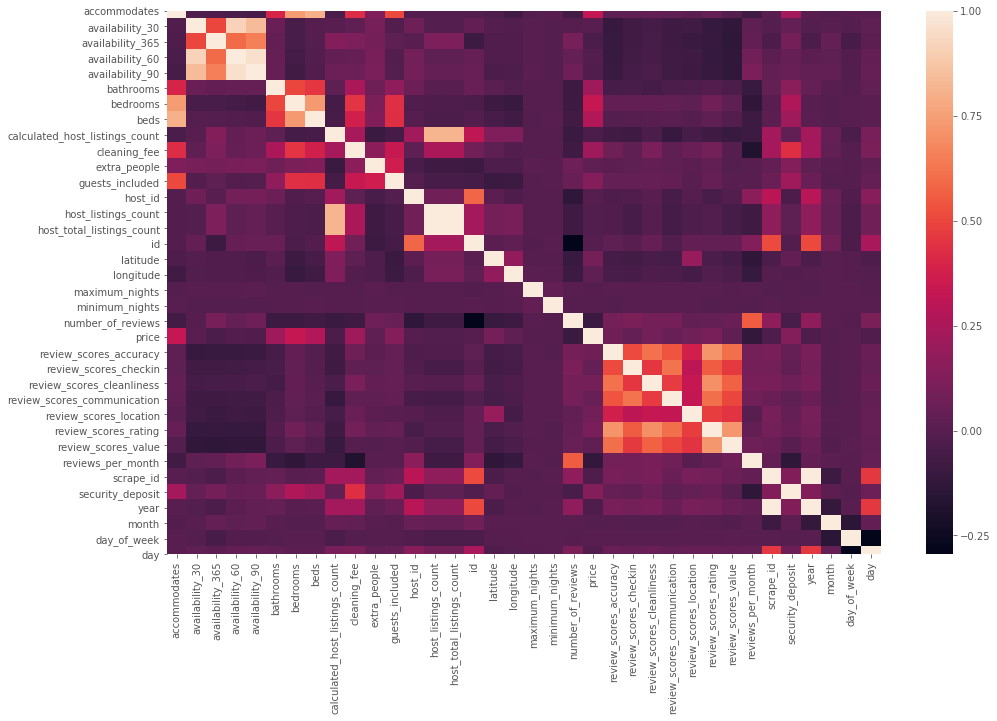

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
corr = numeric_data.corr()
sns.heatmap(corr)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

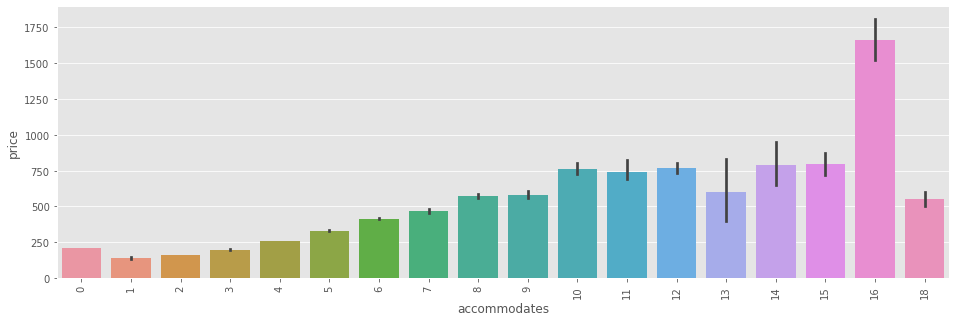

In [26]:
feature = 'accommodates'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

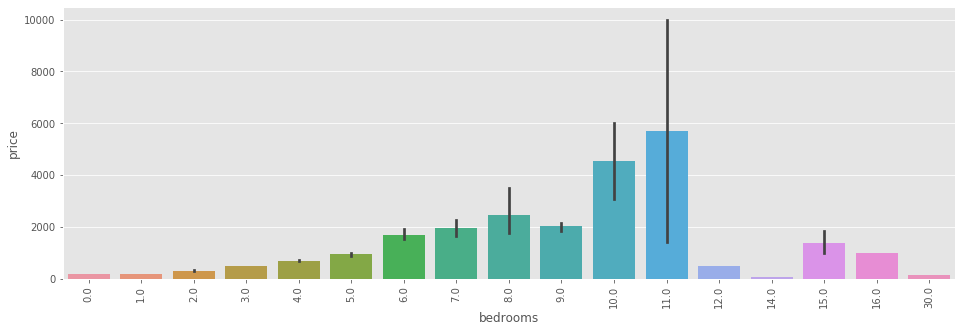

In [27]:
feature = 'bedrooms'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

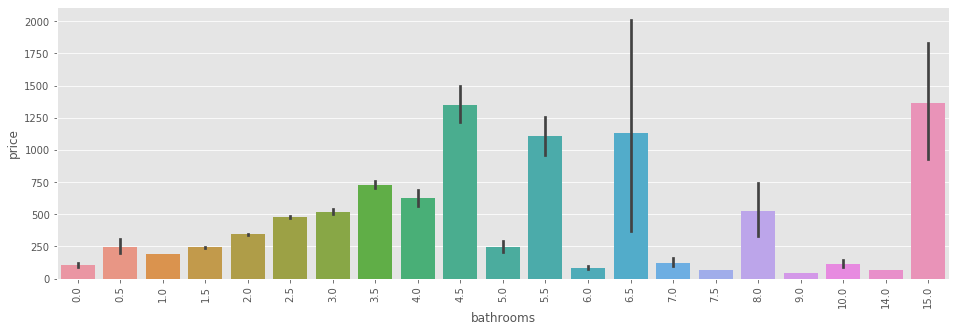

In [28]:
feature = 'bathrooms'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

### Why do some places with a lot of bedrooms & bathroom suddenly drop in price?

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

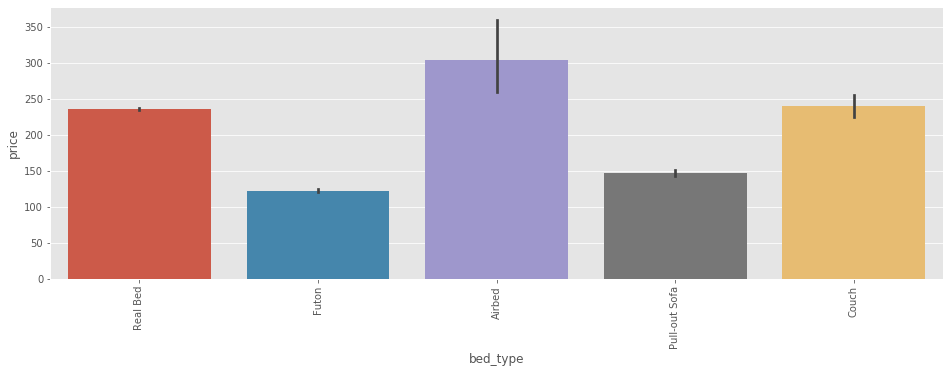

In [29]:
feature = 'bed_type'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#Why are places with Airbeds more popular?

0.0       178939
500.0      45985
200.0      22158
100.0      20405
300.0      17442
           ...  
4999.0         1
3999.0         1
5150.0         1
1160.0         1
1150.0         1
Name: security_deposit, Length: 300, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

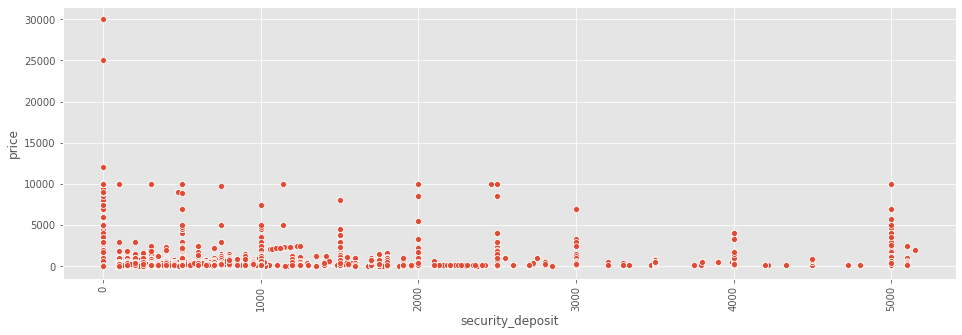

In [30]:
feature = 'security_deposit'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#May be useful to convert to "Has Security Deposit?" feature

100.0    79330
98.0     28418
97.0     24700
96.0     22222
99.0     21446
         ...  
61.0         2
44.0         2
49.0         2
52.0         1
28.0         1
Name: review_scores_rating, Length: 60, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

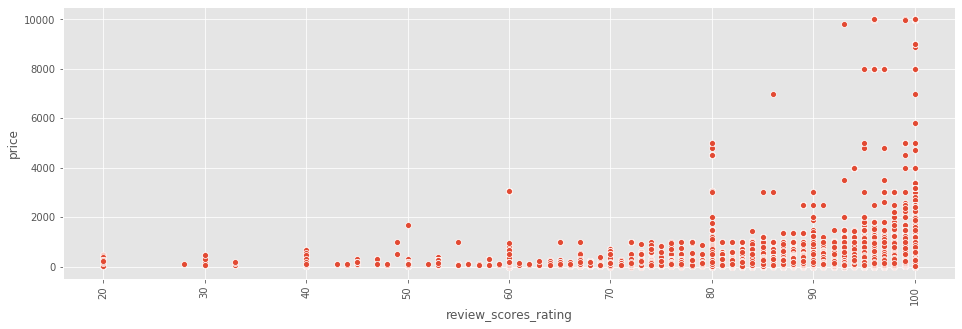

In [31]:
feature = 'review_scores_rating'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#Clear indication that higher reviews will have higher listing prices

10.0    192023
9.0      68191
8.0      17348
7.0       4099
6.0       2392
4.0        662
2.0        420
5.0        266
3.0         70
Name: review_scores_cleanliness, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

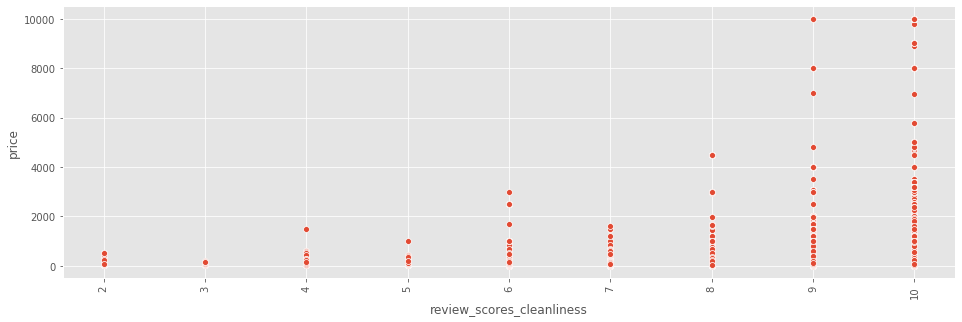

In [32]:
feature = 'review_scores_cleanliness'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

10.0    193390
9.0      73058
8.0      13562
7.0       2627
6.0       1822
4.0        312
2.0        204
5.0        141
3.0         71
Name: review_scores_location, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

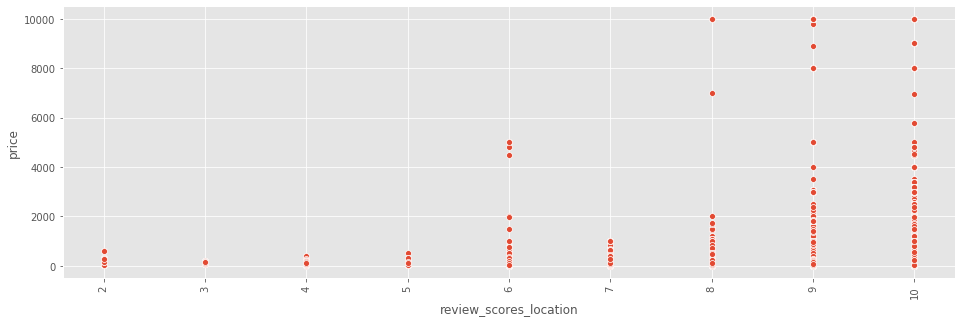

In [33]:
feature = 'review_scores_location'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

10.0    144124
9.0     116455
8.0      18630
7.0       2665
6.0       2041
4.0        511
2.0        400
5.0        304
3.0          5
Name: review_scores_value, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

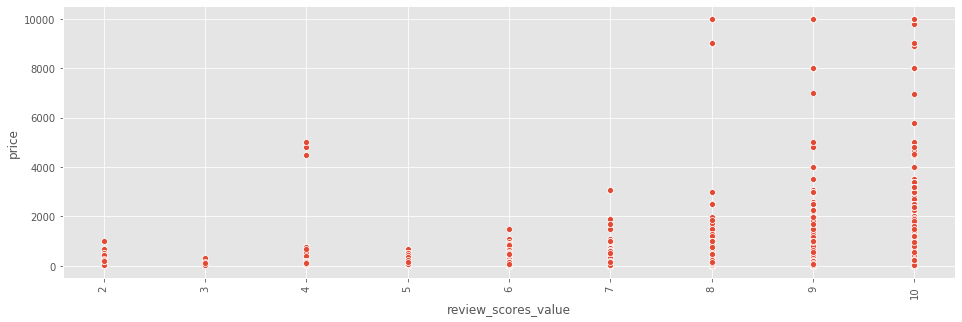

In [34]:
feature = 'review_scores_value'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

## Categorical Data Visualizations

In [35]:
#No experiences offered, cannot use
train_df['experiences_offered'].value_counts()

none    355869
Name: experiences_offered, dtype: int64

In [36]:
#Host Since Date?
# train_df['host_since'].

SyntaxError: invalid syntax (<ipython-input-36-b51c037e8dc1>, line 2)

### Seems that host that take longer to reply have higher daily price, however with more error. This is likely due to the fact that longer response time hosts are the minority

within an hour        164446
within a few hours     73721
within a day           41609
a few days or more      4613
Name: host_response_time, dtype: int64


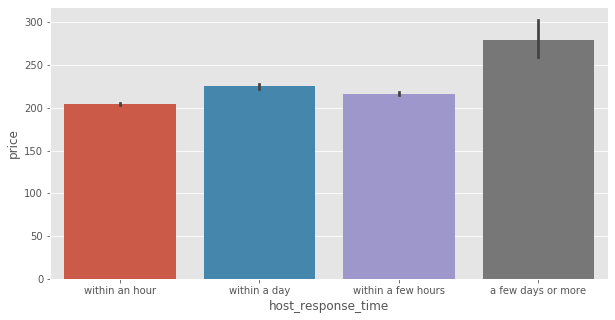

In [37]:
#Host_response_time
feature = 'host_response_time'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

100%    214760
90%      10778
80%       5235
99%       4236
98%       4024
         ...  
32%          1
6%           1
5%           1
4%           1
19%          1
Name: host_response_rate, Length: 97, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text xticklabel objects>)

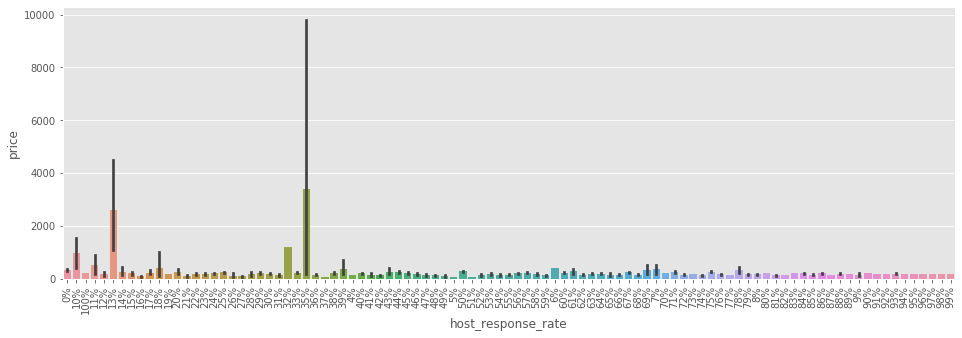

In [38]:
feature = 'host_response_rate'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df.sort_values(feature), x=feature, y='price' )
plt.xticks(rotation=90)
#Note to self: Transform this into bins
#Random distribution. The highest listing prices have low response rates. Likely too many interested parties?

f    265747
t     95256
Name: host_is_superhost, dtype: int64


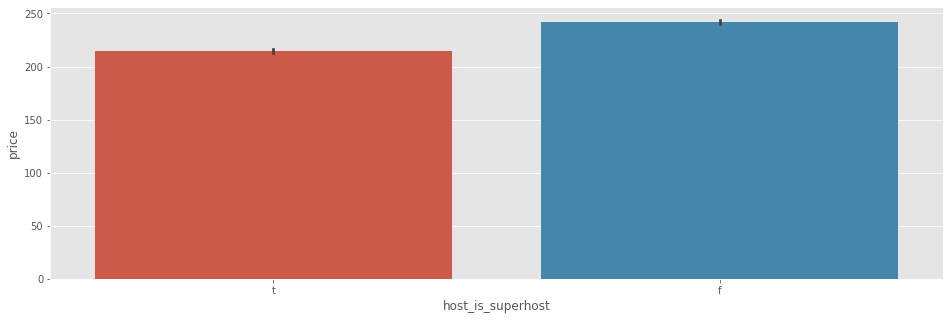

In [39]:
feature = 'host_is_superhost'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
#No indication that a superhost is significant

In [40]:
train_df['host_total_listings_count'].value_counts()

1.0      186530
2.0       58791
3.0       24702
4.0       16599
5.0        8756
          ...  
591.0         1
144.0         1
211.0         1
740.0         1
318.0         1
Name: host_total_listings_count, Length: 384, dtype: int64

## Neighborhoods have clear impact on the listing price

Mission                  40905
Western Addition         30953
South of Market          27278
Downtown/Civic Center    22282
Castro/Upper Market      20817
Bernal Heights           19035
Haight Ashbury           17449
Noe Valley               15782
Nob Hill                 12713
Outer Sunset             11827
Marina                   11536
Potrero Hill             11407
Inner Richmond           11212
Russian Hill              9172
Pacific Heights           9025
Outer Richmond            7859
Outer Mission             7643
North Beach               7584
Inner Sunset              7150
Excelsior                 6648
Bayview                   6404
Financial District        6364
Parkside                  5929
West of Twin Peaks        5661
Chinatown                 5402
Ocean View                5154
Twin Peaks                3559
Glen Park                 3377
Lakeshore                 2510
Visitacion Valley         2483
Crocker Amazon            1774
Presidio Heights          1605
Seacliff

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

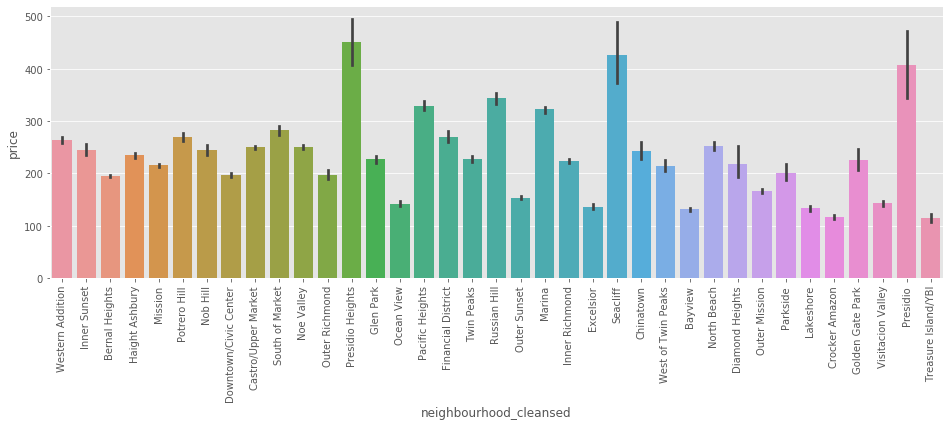

In [41]:
feature = 'neighbourhood_cleansed'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

**Note to self: Chloropleth Map of Neighborhoods if time permits**

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

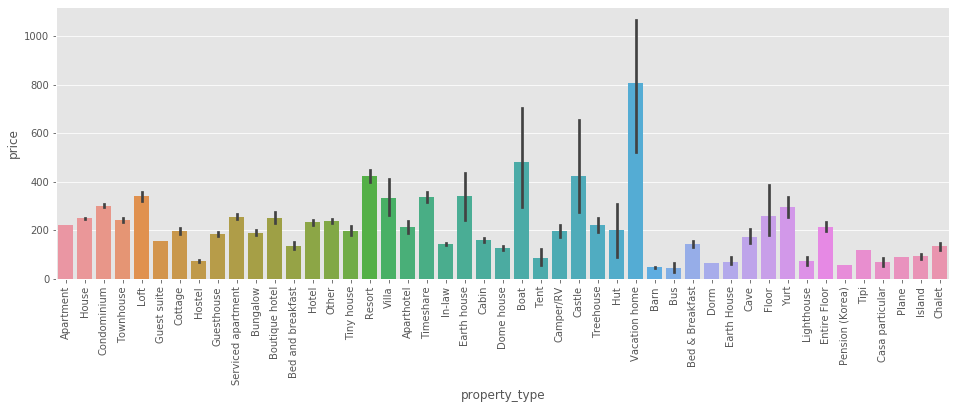

In [42]:
feature = 'property_type'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout
#Pretty even distribution unless it is a vacation home. Either feature engineer for "vacation home?" 

Entire home/apt    213150
Private room       135917
Shared room         11389
Hotel room            838
Name: room_type, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

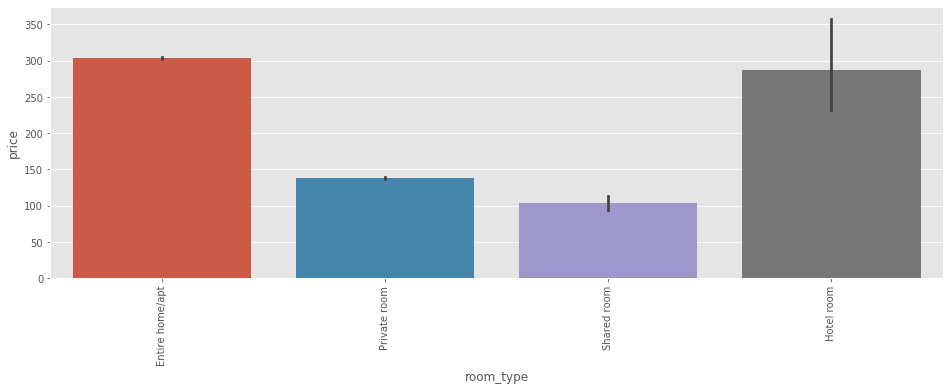

In [43]:
feature = 'room_type'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout
#Clear distributions depending on type of room, will create dummies for this.

f    260700
t     95169
Name: instant_bookable, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

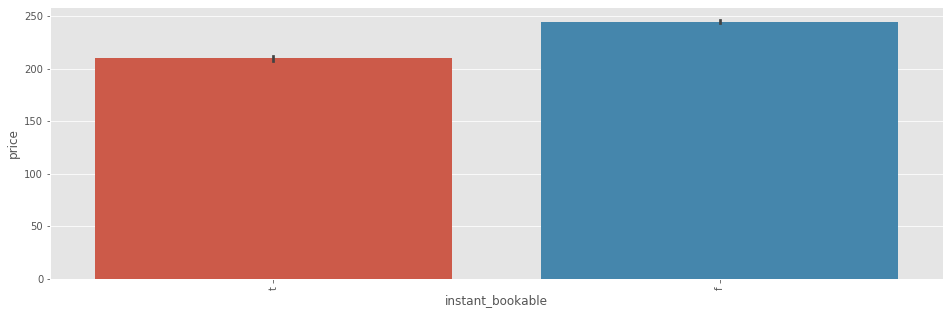

In [44]:
feature = 'instant_bookable'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

In [ ]:
feature = 'cancellation_policy'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

## Feature Engineering Ideas

In [45]:
'''Extract value from text columns?'''
train_df[['name', 'summary',
       'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about']].isnull().sum().sort_values(ascending=False).head(50)/len(train_df)

KeyError: "['house_rules', 'interaction', 'access'] not in index"

In [ ]:
train_df['amenities'].value_counts()
train_df['num_amenities'] = train_df['amenities'].transform(lambda x: len(x.split(',')))
train_df['num_amenities'].nunique()

plt.figure(figsize=(16,10))
sns.scatterplot(data=train_df, y='price', x='num_amenities')
#Doesn't seem to be a relationship between number of amenities and price
#May want to look into all amenities and see if certain amenities have higher listing prices?

In [ ]:
#Create text features/vectors based on transit, space & interaction??
train_df['transit'].head(50)
train_df['space'].head(50)

In [ ]:
train_df.head()

In [ ]:
#Convert the extra fees into Y or N to see the impact
cols = ['has_deposit','has_cleaning_fee','extra_people_fee']

train_df['has_deposit'] = train_df['security_deposit'].transform(lambda x: 1 if x>0 else 0)
train_df['has_cleaning_fee'] = train_df['cleaning_fee'].transform(lambda x: 1 if x>0 else 0)
train_df['extra_people_fee'] = train_df['extra_people'].transform(lambda x: 1 if x>0 else 0)
#Slight difference between daily rates with places that have a security deposit and not. Likely nicer place?

In [ ]:
feature = 'has_deposit'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

In [ ]:
feature = 'has_cleaning_fee'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

In [ ]:
feature = 'extra_people_fee'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

## Train & Validation Split > EDA happens prior to this?

In [ ]:
#Use 2017-first half of 2019 for training & cross-validation 
#Remaining half of 2019 > 2020 for testing

## Models

In [ ]:
#Note to self: Transform y to log for more normal distribution